# 请调用sklearn中的乳腺癌数据集(breast_cancer)进行实验并撰写实验报告，要求如下：

## 在终端输出数据集的基本信息，并将数据集划分为训练集与测试集（建议测试集占比30%左右）；
## 调用sklearn中的SVC，比较采用不同的核函数的SVM（如线性核、多项式核、RBF核等）在测试集上的分类效果，在终端输出采用不同的核函数的SVM在测试集上的准确率、分类报告，并输出混淆矩阵图像，选出效果最好的核函数；
## 使用2选择出来的效果最好的核函数，对以下三个数据进行预测，在终端输出预测结果、每个类别的预测概率： 
## 更改超参数C、核函数有关的超参数，观察在测试集上分类准确率，分析其对分类效果、泛化能力的影响。

数据基本信息如下：
特征名称：['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
目标类别名称：['malignant' 'benign']
数据维度：(569, 30)
测试{kernel}核函数 
linear核函数的准确率为: 0.9825
以下为分类报告：
             precision    recall  f1-score   support

  malignant       0.98      0.97      0.98        64
     benign       0.98      0.99      0.99       107

avg / total       0.98      0.98      0.98       171



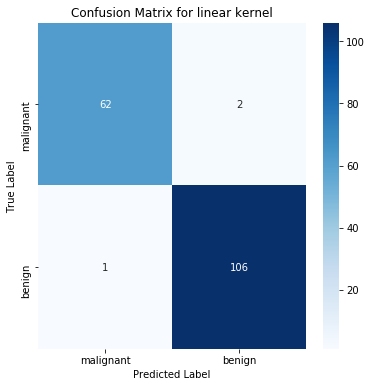

测试{kernel}核函数 
poly核函数的准确率为: 0.8947
以下为分类报告：
             precision    recall  f1-score   support

  malignant       1.00      0.72      0.84        64
     benign       0.86      1.00      0.92       107

avg / total       0.91      0.89      0.89       171



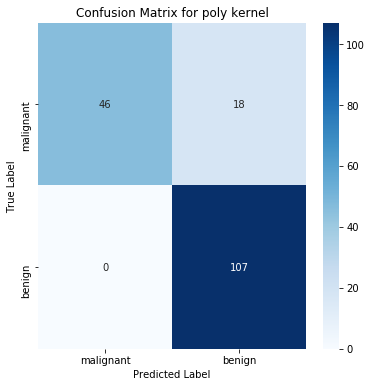

测试{kernel}核函数 
rbf核函数的准确率为: 0.9766
以下为分类报告：
             precision    recall  f1-score   support

  malignant       0.97      0.97      0.97        64
     benign       0.98      0.98      0.98       107

avg / total       0.98      0.98      0.98       171



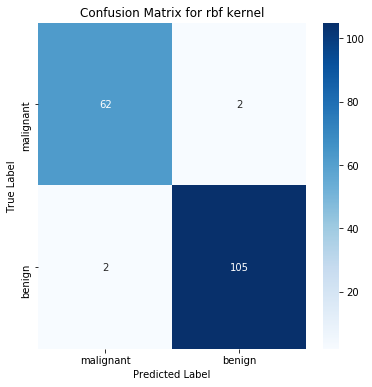

测试{kernel}核函数 
sigmoid核函数的准确率为: 0.9357
以下为分类报告：
             precision    recall  f1-score   support

  malignant       0.91      0.92      0.91        64
     benign       0.95      0.94      0.95       107

avg / total       0.94      0.94      0.94       171



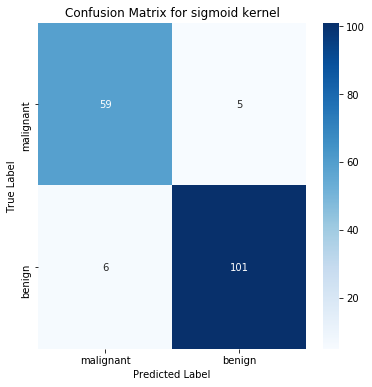

效果最好的核函数是 'linear', 准确率为: 0.9825


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 加载乳腺癌数据
cancer_data = load_breast_cancer()
print("数据基本信息如下：")
print(f"特征名称：{cancer_data.feature_names}")
print(f"目标类别名称：{cancer_data.target_names}")
print(f"数据维度：{cancer_data.data.shape}")
# print("数据集描述如下：")
# print(cancer_data.DESCR)

X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = ''
best_accuracy = 0.0
best_model = None

for kernel in kernels:
    print("测试{kernel}核函数 ")
    
    model = SVC(kernel=kernel, C=1.0, probability=True, random_state=42)
    
    model.fit(X_train_scaled, y_train) 
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel}核函数的准确率为: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_model = model
        
    print("以下为分类报告：")
    print(classification_report(y_test, y_pred, target_names=cancer_data.target_names))

    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                xticklabels=cancer_data.target_names, 
                yticklabels=cancer_data.target_names)
    ax.set_title(f'Confusion Matrix for {kernel} kernel')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    plt.show()

print(f"效果最好的核函数是 '{best_kernel}', 准确率为: {best_accuracy:.4f}")

In [32]:
 new_samples = np.array([        # 样本1：类似恶性特征
     [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
      1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
      25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
     # 样本2：类似良性特征          
     [13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
      0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023,
      15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259],
     # 样本3：边界案例        
     [14.42, 19.77, 94.48, 642.5, 0.09752, 0.1141, 0.09388, 0.05839, 0.1879, 0.0639,
      0.2895, 1.851, 2.376, 26.85, 0.008005, 0.02895, 0.03321, 0.01424, 0.01462, 0.004452,
      16.33, 30.86, 109.5, 826.4, 0.1431, 0.3026, 0.3194, 0.1565, 0.2078, 0.09209]])
new_samples_scaled = scaler.transform(new_samples)

predictions = best_model.predict(new_samples_scaled)
probabilities = best_model.predict_proba(new_samples_scaled)

for i in range(len(new_samples)):
    predicted_class_index = predictions[i]
    predicted_class_name = cancer_data.target_names[predicted_class_index]
    print(f"预测结果: {predicted_class_name} (类别索引: {predicted_class_index})")
    
    for j, class_name in enumerate(cancer_data.target_names):
        print(f"    - 类别 '{class_name}': {probabilities[i][j]:.4f}")
        

预测结果: malignant (类别索引: 0)
    - 类别 'malignant': 1.0000
    - 类别 'benign': 0.0000
预测结果: benign (类别索引: 1)
    - 类别 'malignant': 0.1926
    - 类别 'benign': 0.8074
预测结果: malignant (类别索引: 0)
    - 类别 'malignant': 0.5936
    - 类别 'benign': 0.4064


超参数C对RBF核SVM性能的影响分析
C = 0.1   | 训练集准确率: 0.9598 | 测试集准确率: 0.9357
C = 1     | 训练集准确率: 0.9824 | 测试集准确率: 0.9766
C = 10    | 训练集准确率: 0.9925 | 测试集准确率: 0.9766
C = 100   | 训练集准确率: 1.0000 | 测试集准确率: 0.9240


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


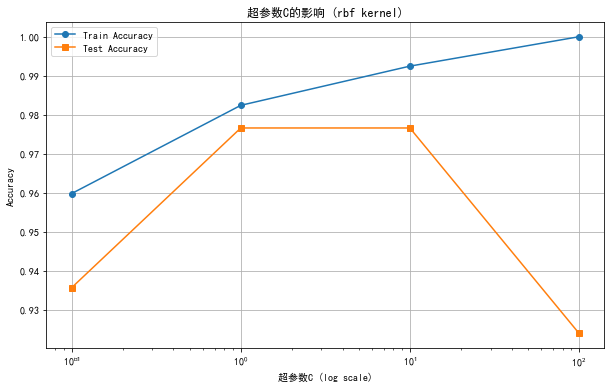

In [51]:
print("超参数C对RBF核SVM性能的影响分析")

C_values = [0.1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

for c in C_values:
    model = SVC(kernel='rbf', C=c, gamma='auto', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"C = {c:<5} | 训练集准确率: {train_acc:.4f} | 测试集准确率: {test_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, 'o-', label='Train Accuracy')
plt.plot(C_values, test_accuracies, 's-', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('超参数C (log scale)')
plt.ylabel('Accuracy')
plt.title('超参数C的影响 (rbf kernel)')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend()
plt.grid(True)
plt.show()

核函数超参数gamma对RBF核SVM性能的影响分析
gamma = 0.001  | 训练集准确率: 0.9497 | 测试集准确率: 0.9415
gamma = 0.01   | 训练集准确率: 0.9799 | 测试集准确率: 0.9649
gamma = 0.1    | 训练集准确率: 0.9849 | 测试集准确率: 0.9591
gamma = 1      | 训练集准确率: 1.0000 | 测试集准确率: 0.6257
gamma = 10     | 训练集准确率: 1.0000 | 测试集准确率: 0.6257


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


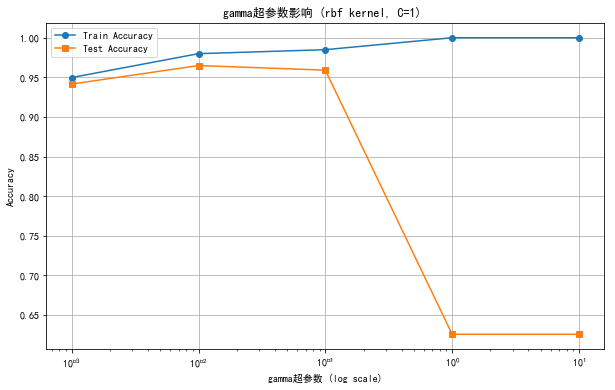

In [50]:
print("核函数超参数gamma对RBF核SVM性能的影响分析")

gamma_values = [0.001, 0.01, 0.1, 1, 10]
train_accuracies_g = []
test_accuracies_g = []

for g in gamma_values:
    model = SVC(kernel='rbf', C=1, gamma=g, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    
    train_accuracies_g.append(train_acc)
    test_accuracies_g.append(test_acc)
    
    print(f"gamma = {g:<6} | 训练集准确率: {train_acc:.4f} | 测试集准确率: {test_acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_accuracies_g, 'o-', label='Train Accuracy')
plt.plot(gamma_values, test_accuracies_g, 's-', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('gamma超参数 (log scale)')
plt.ylabel('Accuracy')
plt.title('gamma超参数影响 (rbf kernel, C=1) ')
plt.legend()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.grid(True)
plt.show()